In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
from sklearn.datasets import fetch_openml

# load the MNIST dataset
mnist_data = fetch_openml('mnist_784')

In [3]:
print(mnist_data['data'].shape)
print(mnist_data['target'].shape)

X = mnist_data['data']
y = mnist_data['target']

(70000, 784)
(70000,)


In [4]:
from sklearn.model_selection import train_test_split

# split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=1/7)
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(60000, 784)
(60000,)
(10000, 784)
(10000,)


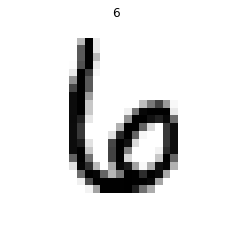

In [5]:
%matplotlib inline
import matplotlib.pyplot as plt

index = 2

# plot an example
def plot_example(X, y):
    plt.imshow(X.reshape(28, 28), cmap='binary')
    plt.axis(False)
    plt.title(f"{y}")

plot_example(X_train[index], y_train[index])
plt.show()

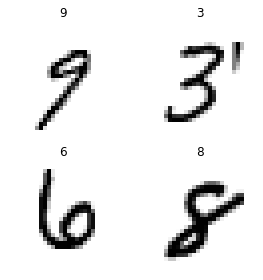

In [6]:
# plot a few examples
fig = plt.figure(figsize=(4, 4))

for i in range(4):
    fig.add_subplot(2, 2, i+1)
    plot_example(X_train[i], y_train[i])

fig.tight_layout()
plt.show()

In [7]:
import numpy as np

def one_hot_encode(x, num_classes=10):
    x_one_hot = x.astype(int).reshape(-1)
    x_one_hot = np.eye(num_classes)[x_one_hot]
    return x_one_hot

# one-hot encode labels
y_train_one_hot = one_hot_encode(y_train)
y_test_one_hot = one_hot_encode(y_test)

In [8]:
# normalize the inputs
X_train_normalized = X_train / 255.0
X_test_normalized = X_test / 255.0

In [156]:
from models import Sequential
from layers import Dense

# create the model
model = Sequential([
    Dense(16, input_shape=(784,), activation="softmax"),
    Dense(16, activation="softmax"),
    Dense(10, activation="softmax")
])

In [159]:
# prepare the model for training
model.compile(loss="categorical_crossentropy",
              learning_rate=0.1,
              metrics=['categorical_accuracy'])

print(model.evaluate(X_train_normalized, y_train_one_hot))
# history = []

loss=2.3024	accuracy=0.1119
(2.3024019977037873, [0.11188333333333333])


In [ ]:
np.seterr(all='warn')

# train the model
model.fit(X_train_normalized, y_train_one_hot, epochs=200);

Epoch 1:	loss=2.3024	accuracy=0.1119
Epoch 2:	loss=2.3024	accuracy=0.1119
Epoch 3:	loss=2.3023	accuracy=0.1119
Epoch 4:	loss=2.3023	accuracy=0.1119
Epoch 5:	loss=2.3023	accuracy=0.1119
Epoch 6:	loss=2.3023	accuracy=0.1119
Epoch 7:	loss=2.3022	accuracy=0.1119
Epoch 8:	loss=2.3022	accuracy=0.1119
Epoch 9:	loss=2.3022	accuracy=0.1119
Epoch 10:	loss=2.3022	accuracy=0.1119
Epoch 11:	loss=2.3021	accuracy=0.1119
Epoch 12:	loss=2.3021	accuracy=0.1119
Epoch 13:	loss=2.3021	accuracy=0.1119
Epoch 14:	loss=2.3021	accuracy=0.1119
Epoch 15:	loss=2.3021	accuracy=0.1119
Epoch 16:	loss=2.3020	accuracy=0.1119
Epoch 17:	loss=2.3020	accuracy=0.1119
Epoch 18:	loss=2.3020	accuracy=0.1119
Epoch 19:	loss=2.3020	accuracy=0.1119
Epoch 20:	loss=2.3020	accuracy=0.1119
Epoch 21:	loss=2.3019	accuracy=0.1119
Epoch 22:	loss=2.3019	accuracy=0.1119
Epoch 23:	loss=2.3019	accuracy=0.1119
Epoch 24:	loss=2.3019	accuracy=0.1119
Epoch 25:	loss=2.3019	accuracy=0.1119
Epoch 26:	loss=2.3018	accuracy=0.1119
Epoch 27:	loss=2.3018

In [132]:
y_pred = model.call(X_train)

print(y_pred)

[[0.99435567 0.99543325 0.9944459  ... 0.99484271 0.99415878 0.99443751]
 [0.99435567 0.99543325 0.9944459  ... 0.99484271 0.99415878 0.99443751]
 [0.99435567 0.99543325 0.9944459  ... 0.99484271 0.99415878 0.99443751]
 ...
 [0.99435567 0.99543325 0.9944459  ... 0.99484271 0.99415878 0.99443751]
 [0.99435567 0.99543325 0.9944459  ... 0.99484271 0.99415878 0.99443751]
 [0.99435567 0.99543325 0.9944459  ... 0.99484271 0.99415878 0.99443751]]


/home/moaz/Learn/AI/Machine Learning 2020/Deep Learning From Scratch/activations.py:14: RuntimeWarning: underflow encountered in exp
  return 1 / (1 + np.exp(-x))


In [72]:
print((model.layers[-1].cache['linear'])[0:5].sum(axis=0))
# print(model.)
print(y_train_one_hot[0:5])

[nan nan nan nan nan nan nan nan nan nan]
[[0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]


In [300]:
for i in range(115, 130):
    print(f"Epoch {i+1}: {history[i]['loss']}")
    print(history[i]['parameters'][1]['biases'].mean().round(3))
    print(y_train_one_hot[0])

Epoch 116: 2.299627642908086
0.085
[0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
Epoch 117: 2.2987160707056655
0.089
[0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
Epoch 118: 2.297547054960231
0.093
[0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
Epoch 119: 2.2969361877346177
0.097
[0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
Epoch 120: 2.3013728923701002
0.102
[0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
Epoch 121: 2.3316311661641502
0.108
[0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
Epoch 122: 2.470877203179891
0.115
[0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
Epoch 123: 2.9382200502740887
0.124
[0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
Epoch 124: 4.071433705680639
0.135
[0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
Epoch 125: 21.65176835997178
0.151
[0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
Epoch 126: nan
0.175
[0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
Epoch 127: nan
nan
[0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
Epoch 128: nan
nan
[0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
Epoch 129: nan
nan
[0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
Epoch 130: nan
nan
[0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]


In [262]:
history[1-1]['parameters'][2]['activations']

array([[0.09979146, 0.11161951, 0.09737951, ..., 0.10534638, 0.09922102,
        0.09857147],
       [0.09987466, 0.11158282, 0.0972883 , ..., 0.10537053, 0.09927624,
        0.0985752 ],
       [0.10208017, 0.11050944, 0.09498945, ..., 0.10592384, 0.10069647,
        0.09860435],
       ...,
       [0.10137038, 0.11085667, 0.09572133, ..., 0.10574528, 0.10024484,
        0.09859454],
       [0.09981856, 0.11160903, 0.09734868, ..., 0.1053593 , 0.09923641,
        0.09856812],
       [0.10040861, 0.11130731, 0.09672001, ..., 0.10551907, 0.09963273,
        0.0985899 ]])

In [121]:
from tensorflow import keras

k_model = keras.Sequential([
    keras.layers.Dense(16, input_shape=(784,), activation="sigmoid", kernel_initializer=keras.initializers.RandomNormal(stddev=0.01)),
    keras.layers.Dense(16, activation="sigmoid", kernel_initializer=keras.initializers.RandomNormal(stddev=0.01)),
    keras.layers.Dense(10, activation="sigmoid", kernel_initializer=keras.initializers.RandomNormal(stddev=0.01))
])

k_model.compile(loss="categorical_crossentropy",
                optimizer=keras.optimizers.SGD(lr=0.1),
                metrics=['accuracy'])

k_model.fit(X_train_normalized, y_train_one_hot, batch_size=X_train_normalized.shape[0], epochs=100)

Train on 60000 samples
Epoch 1/100
60000/60000 [==============================] - 1s 10us/sample - loss: 2.3025 - accuracy: 0.0990
Epoch 2/100
60000/60000 [==============================] - 0s 3us/sample - loss: 2.3025 - accuracy: 0.0990
Epoch 3/100
60000/60000 [==============================] - 0s 2us/sample - loss: 2.3024 - accuracy: 0.0990
Epoch 4/100
60000/60000 [==============================] - 0s 2us/sample - loss: 2.3024 - accuracy: 0.0990
Epoch 5/100
60000/60000 [==============================] - 0s 2us/sample - loss: 2.3024 - accuracy: 0.0990
Epoch 6/100
60000/60000 [==============================] - 0s 2us/sample - loss: 2.3024 - accuracy: 0.0990
Epoch 7/100
60000/60000 [==============================] - 0s 2us/sample - loss: 2.3023 - accuracy: 0.0990
Epoch 8/100
60000/60000 [==============================] - 0s 2us/sample - loss: 2.3023 - accuracy: 0.0990
Epoch 9/100
60000/60000 [==============================] - 0s 2us/sample - loss: 2.3023 - accuracy: 0.0990
Epoch 10/100


Epoch 77/100
60000/60000 [==============================] - 0s 2us/sample - loss: 2.3014 - accuracy: 0.1119
Epoch 78/100
60000/60000 [==============================] - 0s 2us/sample - loss: 2.3014 - accuracy: 0.1119
Epoch 79/100
60000/60000 [==============================] - 0s 2us/sample - loss: 2.3014 - accuracy: 0.1119
Epoch 80/100
60000/60000 [==============================] - 0s 2us/sample - loss: 2.3014 - accuracy: 0.1119
Epoch 81/100
60000/60000 [==============================] - 0s 2us/sample - loss: 2.3014 - accuracy: 0.1119
Epoch 82/100
60000/60000 [==============================] - 0s 2us/sample - loss: 2.3014 - accuracy: 0.1119
Epoch 83/100
60000/60000 [==============================] - 0s 2us/sample - loss: 2.3014 - accuracy: 0.1119
Epoch 84/100
60000/60000 [==============================] - 0s 2us/sample - loss: 2.3014 - accuracy: 0.1119
Epoch 85/100
60000/60000 [==============================] - 0s 2us/sample - loss: 2.3014 - accuracy: 0.1119
Epoch 86/100
60000/60000 [==

In [ ]:
model.layers[0].call(X_train)

In [15]:
import torch

In [109]:
torch.random.manual_seed(42)
np.random.seed(42)

x = torch.randn(2, 2)
print(x)

my_dense = Dense(1, input_shape=x.shape[1:])
my_dense.build(my_dense.input_shape)
print("My Dense Layer:")
print("Weights:")
print(my_dense.weights)
print()
print("Biases:")
print(my_dense.biases)
print()
print("Activations:")
print(my_dense(x.numpy()))
print()
print()

torch_dense = torch.nn.Linear(x.shape[1], 1)
with torch.no_grad():
    torch_dense.weight = torch.nn.Parameter(torch.tensor(my_dense.weights.T, dtype=torch.float))
    torch_dense.bias = torch.nn.Parameter(torch.tensor(my_dense.biases, dtype=torch.float))

    print("Torch Dense Layer:")
    print("Weights:")
    print(torch_dense.weight.numpy())
    print()
    print("Biases:")
    print(torch_dense.bias.numpy())
    print()
    print("Activations:")
    print(torch_dense(x).numpy())

tensor([[0.3367, 0.1288],
        [0.2345, 0.2303]])
My Dense Layer:
Weights:
[[ 0.00496714]
 [-0.00138264]]

Biases:
[[0.]]

Activations:
[[0.00149429]
 [0.00084614]]


Torch Dense Layer:
Weights:
[[ 0.00496714 -0.00138264]]

Biases:
[[0.]]

Activations:
[[0.00149429]
 [0.00084614]]


In [130]:
torch.random.manual_seed(42)
np.random.seed(42)

# x = torch.randn(2, 2)
x = torch.tensor([[100, 200],
                  [400, 1000000]], dtype=torch.float)
print(x)

my_dense = Dense(3, input_shape=x.shape[1:], activation="softmax")
my_dense.build(my_dense.input_shape)
my_dense.weights *= 100
print("My Dense Layer:")
print("Weights:")
print(my_dense.weights)
print()
print("Biases:")
print(my_dense.biases)
print()
print("Activations:")
# print(my_dense(x.numpy()))
print()
print()

torch_dense = torch.nn.Linear(x.shape[1], 1)
torch_softmax = torch.nn.Softmax(dim=1)

with torch.no_grad():
    torch_dense.weight = torch.nn.Parameter(torch.tensor(my_dense.weights.T, dtype=torch.float))
    torch_dense.bias = torch.nn.Parameter(torch.tensor(my_dense.biases, dtype=torch.float))

    print("Torch Dense Layer:")
    print("Weights:")
    print(torch_dense.weight.numpy())
    print()
    print("Biases:")
    print(torch_dense.bias.numpy())
    print()
    print("Linear Output:")
    print(torch_dense(x).numpy())
    print()
    print("Activations:")
    print(torch_softmax(torch_dense(x)).numpy())

tensor([[1.0000e+02, 2.0000e+02],
        [4.0000e+02, 1.0000e+06]])
My Dense Layer:
Weights:
[[ 0.49671415 -0.1382643   0.64768854]
 [ 1.52302986 -0.23415337 -0.23413696]]

Biases:
[[0. 0. 0.]]

Activations:


Torch Dense Layer:
Weights:
[[ 0.49671414  1.5230298 ]
 [-0.1382643  -0.23415338]
 [ 0.64768857 -0.23413695]]

Biases:
[[0. 0. 0.]]

Linear Output:
[[ 3.5427737e+02 -6.0657104e+01  1.7941467e+01]
 [ 1.5232284e+06 -2.3420869e+05 -2.3387788e+05]]

Activations:
[[1. 0. 0.]
 [1. 0. 0.]]


In [ ]:
help(torch.tensor([[2, 4]], dtype=torch.float).softmax)

In [96]:
from activations import Softmax, Sigmoid
import scipy.special

softmax = Softmax()
sigmoid = Sigmoid()
x = np.array([[1, 2, 3],
              [1000, 100, 10],
              [12345, 67890, 999999999]])

np.seterr(all='warn')
print(softmax(x))
print(scipy.special.softmax(x, axis=-1))
print(scipy.special.expit(x))
print(sigmoid(x))

[[0.09003057 0.24472847 0.66524096]
 [1.         0.         0.        ]
 [0.         0.         1.        ]]
[[0.09003057 0.24472847 0.66524096]
 [1.         0.         0.        ]
 [0.         0.         1.        ]]
[[0.73105858 0.88079708 0.95257413]
 [1.         1.         0.9999546 ]
 [1.         1.         1.        ]]
[[0.73105858 0.88079708 0.95257413]
 [1.         1.         0.9999546 ]
 [1.         1.         1.        ]]


/home/moaz/Learn/AI/Machine Learning 2020/Deep Learning From Scratch/activations.py:27: RuntimeWarning: underflow encountered in exp
  exp_z = np.exp(z)
/home/moaz/.local/lib/python3.7/site-packages/scipy/special/_logsumexp.py:112: RuntimeWarning: underflow encountered in exp
  tmp = np.exp(a - a_max)
/home/moaz/.local/lib/python3.7/site-packages/scipy/special/_logsumexp.py:215: RuntimeWarning: underflow encountered in exp
  return np.exp(x - logsumexp(x, axis=axis, keepdims=True))
/home/moaz/Learn/AI/Machine Learning 2020/Deep Learning From Scratch/activations.py:14: RuntimeWarning: underflow encountered in exp
  return 1 / (1 + np.exp(-x))


In [111]:
from losses import CategoricalCrossentropy
from tensorflow.keras.losses import CategoricalCrossentropy as KCC

loss_fn = CategoricalCrossentropy()
k_loss_fn = KCC()
y_pred = model.call(X_train)

print(loss_fn(y_train_one_hot, y_pred))
print(k_loss_fn(y_train_one_hot, y_pred))

0.6884189731172677
tf.Tensor(2.302356719970703, shape=(), dtype=float64)


In [136]:
m = y_train_one_hot.shape[0]

-np.sum(y_train_one_hot * np.log(y_pred / np.sum(y_pred, axis=-1, keepdims=True))) / m

2.302563020449781